In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Annual AQI Nationwide

In [2]:
data = pd.read_csv('./annual_county_aqi/annual_aqi_by_county_2020.csv')
data.columns = data.columns.str.replace(' ', '_').str.lower()
data

,state,county,year,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,max_aqi,90th_percentile_aqi,median_aqi,days_co,days_no2,days_ozone,days_so2,days_pm2.5,days_pm10
0,Alabama,Baldwin,2020,269,250,19,0,0,0,0,74,49,36,0,0,198,0,71,0
1,Alabama,Clay,2020,108,99,9,0,0,0,0,86,49,26,0,0,0,0,108,0
2,Alabama,DeKalb,2020,364,350,14,0,0,0,0,90,45,36,0,0,331,0,33,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0,0
4,Alabama,Etowah,2020,278,260,18,0,0,0,0,92,46,34,0,0,204,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,Wyoming,Sublette,2020,366,297,64,4,1,0,0,151,61,44,0,0,355,0,11,0
1036,Wyoming,Sweetwater,2020,366,238,116,7,4,0,1,1250,76,46,0,5,253,0,7,101
1037,Wyoming,Teton,2020,366,318,36,7,5,0,0,161,54,42,0,0,329,0,37,0
1038,Wyoming,Uinta,2020,366,323,41,2,0,0,0,122,51,40,0,2,225,0,0,139


In [3]:
lst = ['Country Of Mexico', 'Puerto Rico', 'Virgin Islands']
aqi_md = data.groupby('state')['median_aqi'].agg('mean').sort_values(ascending=False).drop(lst)
aqi_90 = data.groupby('state')['90th_percentile_aqi'].agg('mean').sort_values(ascending=False).drop(lst)
aqi_max = data.groupby('state')['max_aqi'].agg('mean').sort_values(ascending=False).drop(lst)

In [4]:
def plot_aqi(x, y, name, xlabel):
    plt.figure(figsize=(10, 5))
    plt.bar(x, y, width=.5, color='lightblue', edgecolor='blue')
    plt.xlabel(xlabel)
    plt.xticks(rotation=90)
    plt.ylabel(f'Annual {name} AQI')
    plt.title(f'Annual {name} AQI Comparison')
    plt.show()

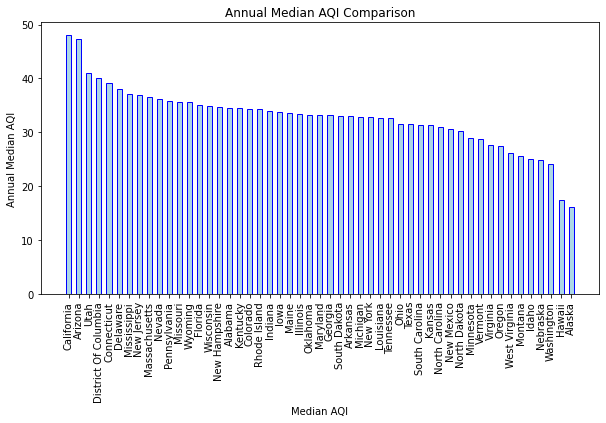

In [7]:
plot_aqi(aqi_md.index, aqi_md, 'Median', 'Median AQI')

In [6]:
# plot_aqi(aqi_90, '90th Percentile')

In [7]:
# plot_aqi(aqi_max, 'Maximum')

In [9]:
demo = pd.read_csv('co-est2021-pop.csv')
demo['county'] = demo['area'].str.split(', ').str[0].str.split(' County').str[0].astype(str)
demo['state'] = demo['area'].str.split(', ').str[1].astype(str)
demo['population'] = demo['population'].str.replace(',', '').astype(int)

In [10]:
new = data.merge(demo, left_on=['state', 'county'], right_on=['state', 'county'], how='inner')

In [11]:
metro = new.sort_values('population', ascending=False)[:20].reset_index()

In [12]:
import statsmodels.api as sm
import numpy as np
y = metro['90th_percentile_aqi']
X = metro['median_aqi']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
para = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     90th_percentile_aqi   R-squared:                       0.954
Model:                             OLS   Adj. R-squared:                  0.952
Method:                  Least Squares   F-statistic:                     375.7
Date:                 Sun, 25 Sep 2022   Prob (F-statistic):           1.65e-13
Time:                         20:21:55   Log-Likelihood:                -74.281
No. Observations:                   20   AIC:                             152.6
Df Residuals:                       18   BIC:                             154.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4202      6.278     -2.775      0.012     -30.610      -4.231
median_aqi     2.0494      0.106     19.383      0.000       1.827       2.272
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   2.456
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.249
Skew:                           0.250   Prob(JB):                        0.883
Kurtosis:                       2.778   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

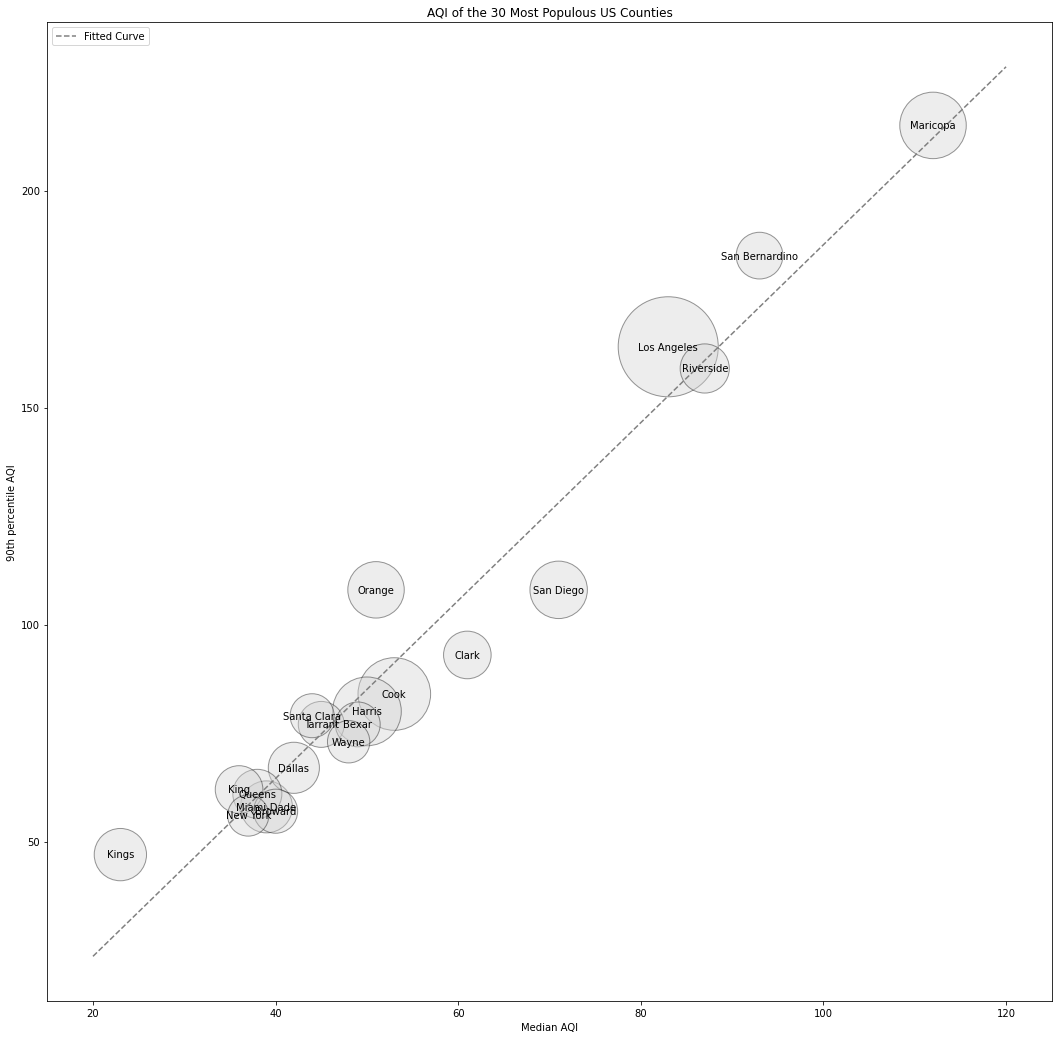

In [14]:
plt.figure(figsize=(18, 18))
plt.scatter(metro['median_aqi'], metro['90th_percentile_aqi'], marker='o', color='lightgray', edgecolor='black', alpha=.4, s=metro['population']/1e3)
for i, txt in enumerate(metro['county'][:20]):
    plt.annotate(txt, (metro['median_aqi'][i], metro['90th_percentile_aqi'][i]), ha='center', va='center', color='black')

x = np.linspace(20, 120, 5)
plt.plot(x, para[1]*x + para[0], '--', color='gray', label='Fitted Curve')
plt.legend(loc=2)
plt.xlabel('Median AQI')
plt.ylabel('90th percentile AQI')
plt.title('AQI of the 30 Most Populous US Counties')
plt.show()

# AQI Data of California

In [14]:
df = pd.read_csv('./previous_data/epa_data_CA_merged.csv', index_col=0)
df.columns = df.columns.str.replace(' ', '_').str.lower()
df

,state_name,county_name,month,day,aqi,category,defining_site,latitude,longitude
0,California,Alameda,1,1,53,Moderate,06-001-0009,37.743065,-122.169935
1,California,Alameda,1,2,43,Good,06-001-0013,37.864767,-122.302741
2,California,Alameda,1,3,74,Moderate,06-001-0013,37.864767,-122.302741
3,California,Alameda,1,4,45,Good,06-001-0007,37.687526,-121.784217
4,California,Alameda,1,5,33,Good,06-001-0007,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...
19220,California,Yolo,12,27,20,Good,06-113-0004,38.534450,-121.773400
19221,California,Yolo,12,28,33,Good,06-113-0004,38.534450,-121.773400
19222,California,Yolo,12,29,28,Good,06-113-0004,38.534450,-121.773400
19223,California,Yolo,12,30,39,Good,06-113-0004,38.534450,-121.773400


In [15]:
df.county_name.unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo'], dtype=object)

In [16]:
la = df.query('county_name == "Los Angeles"').groupby('month')['aqi'].agg('mean')
sf = df.query('county_name == "San Francisco"').groupby('month')['aqi'].agg('mean')
sd = df.query('county_name == "San Diego"').groupby('month')['aqi'].agg('mean')
np = df.query('county_name == "Napa"').groupby('month')['aqi'].agg('mean')
mc = df.query('county_name == "Merced"').groupby('month')['aqi'].agg('mean')
sb = df.query('county_name == "Santa Barbara"').groupby('month')['aqi'].agg('mean')

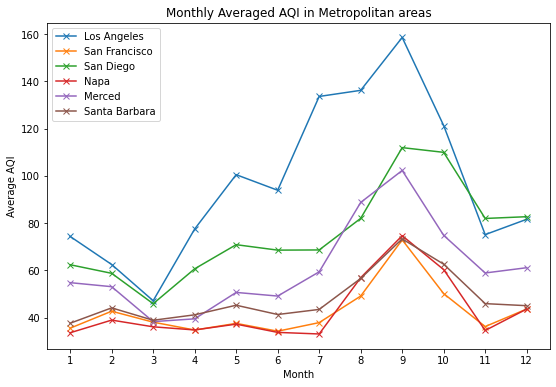

In [17]:
month = range(1, 13)
plt.figure(figsize=(9, 6))
plt.plot(month, la, marker='x', label='Los Angeles')
plt.plot(month, sf, marker='x', label='San Francisco')
plt.plot(month, sd, marker='x', label='San Diego')
plt.plot(month, np, marker='x', label='Napa')
plt.plot(month, mc, marker='x', label='Merced')
plt.plot(month, sb, marker='x', label='Santa Barbara')
plt.xlabel('Month')
plt.xticks(month)
plt.ylabel('Average AQI')
plt.title('Monthly Averaged AQI in Metropolitan areas')
plt.legend()
plt.show()

In [17]:
daily = pd.read_csv('./daily_county_aqi/daily_aqi_by_county_2020.csv')
daily.columns = daily.columns.str.replace(' ', '_').str.lower()

In [45]:
la = daily.query('state_name == "California" and county_name == "Los Angeles"')
len(la)

366

In [44]:
ny = daily.query('state_name == "New York" and county_name == "New York"')
len(ny)

366

In [46]:
ch = daily.query('state_name == "Illinois" and county_name == "Cook"')
len(ch)

366

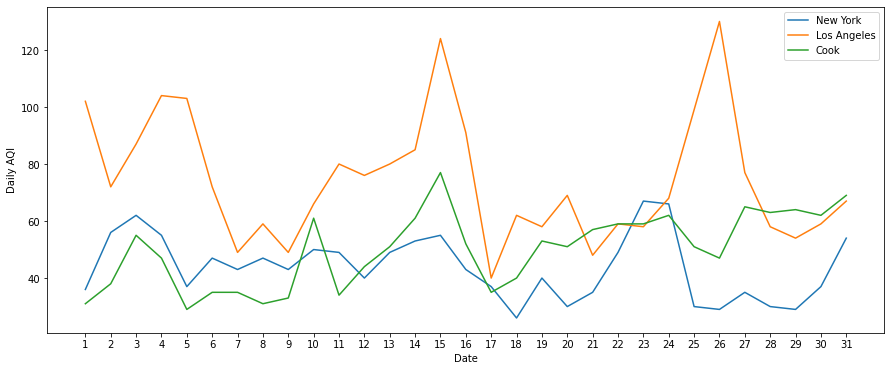

In [55]:
plt.figure(figsize=(15, 6))
date = range(1, 32)
plt.plot(date, ny.aqi[:31], label='New York')
plt.plot(date, la.aqi[:31], label='Los Angeles')
plt.plot(date, ch.aqi[:31], label='Cook')
plt.xlabel('Date')
plt.xticks(date)
plt.ylabel('Daily AQI')
plt.legend()
plt.show()

In [29]:
temp = pd.read_csv('./daily_wind/daily_WIND_2020.csv')
temp.columns = temp.columns.str.replace(' ', '_').str.lower()

In [31]:
temp.query('state_name == "California" and county_name == "Los Angeles"')

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
67418,6,37,2,61103,1,34.13650,-117.92391,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Azusa,"803 N. LOREN AVE., AZUSA",California,Los Angeles,Azusa,"Los Angeles-Long Beach-Anaheim, CA",2020-12-08
67419,6,37,2,61103,1,34.13650,-117.92391,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Azusa,"803 N. LOREN AVE., AZUSA",California,Los Angeles,Azusa,"Los Angeles-Long Beach-Anaheim, CA",2020-12-08
67420,6,37,2,61103,1,34.13650,-117.92391,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Azusa,"803 N. LOREN AVE., AZUSA",California,Los Angeles,Azusa,"Los Angeles-Long Beach-Anaheim, CA",2020-12-08
67421,6,37,2,61103,1,34.13650,-117.92391,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Azusa,"803 N. LOREN AVE., AZUSA",California,Los Angeles,Azusa,"Los Angeles-Long Beach-Anaheim, CA",2020-12-08
67422,6,37,2,61103,1,34.13650,-117.92391,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Azusa,"803 N. LOREN AVE., AZUSA",California,Los Angeles,Azusa,"Los Angeles-Long Beach-Anaheim, CA",2020-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74707,6,37,6012,61104,1,34.38344,-118.52840,WGS84,Wind Direction - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Santa Clarita,"22224 PLACERITA CANYON RD, SANTA CLARITA",California,Los Angeles,Santa Clarita,"Los Angeles-Long Beach-Anaheim, CA",2020-12-09
74708,6,37,6012,61104,1,34.38344,-118.52840,WGS84,Wind Direction - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Santa Clarita,"22224 PLACERITA CANYON RD, SANTA CLARITA",California,Los Angeles,Santa Clarita,"Los Angeles-Long Beach-Anaheim, CA",2020-12-09
74709,6,37,6012,61104,1,34.38344,-118.52840,WGS84,Wind Direction - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Santa Clarita,"22224 PLACERITA CANYON RD, SANTA CLARITA",California,Los Angeles,Santa Clarita,"Los Angeles-Long Beach-Anaheim, CA",2020-12-09
74710,6,37,6012,61104,1,34.38344,-118.52840,WGS84,Wind Direction - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Santa Clarita,"22224 PLACERITA CANYON RD, SANTA CLARITA",California,Los Angeles,Santa Clarita,"Los Angeles-Long Beach-Anaheim, CA",2020-12-09
